In [30]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [31]:
df = pd.read_csv("spotify_tracks_with_metadata_10000.csv")

In [32]:
X = df[["danceability", "energy", "valence", "tempo", "duration_ms", "popularity"]]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


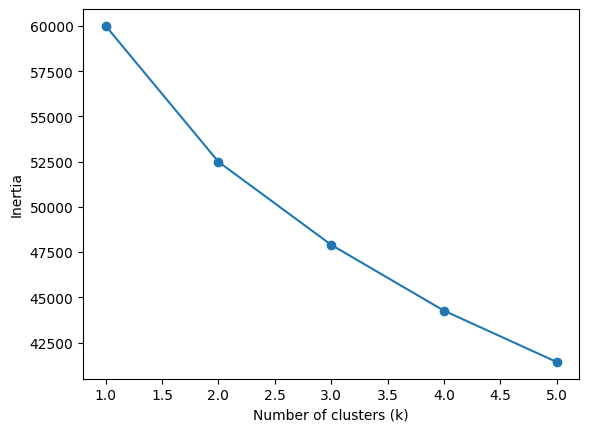

In [33]:
inertia = []
for k in range(1, 6):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 6), inertia, marker='o')
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")
plt.show()

In [34]:
kmeans = KMeans(n_clusters=4, random_state=42)
df["cluster"] = kmeans.fit_predict(X_scaled)
print(df[["track_name", "cluster"]])

            track_name  cluster
0             Love Sky        2
1           Fire Dream        0
2          Light Night        2
3      Love Wave Night        1
4           Fire Light        2
...                ...      ...
9995    Beat Sky Night        2
9996    Sky Night Fire        2
9997         Fire Beat        3
9998  Heart Love Dream        3
9999  Wave Night Heart        3

[10000 rows x 2 columns]


In [35]:
import numpy as np

# Get cluster centers
centroids = kmeans.cluster_centers_

# Inverse transform to original scale
centroids_original = scaler.inverse_transform(centroids)

# Create DataFrame for readability
cluster_profiles = pd.DataFrame(
    centroids_original, 
    columns=["danceability", "energy", "valence", "tempo", "duration_ms", "popularity"]
)

print(cluster_profiles)

   danceability    energy   valence       tempo    duration_ms  popularity
0      0.514666  0.523381  0.257802  124.307510  221352.146789   76.762719
1      0.504341  0.544799  0.723807   90.878510  201509.705553   47.712745
2      0.472870  0.423079  0.727687  166.083747  208993.543716   55.115535
3      0.486221  0.529246  0.278391  136.828400  211527.131652   22.721324


In [36]:
import joblib

In [37]:
joblib.dump(kmeans, "spotify_predictor.pkl")

['spotify_predictor.pkl']

In [38]:
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']